# CLASSIFICATION HACKATHON 


# South African Language Identification

© Explore Data Science Academy

## Hackathon overview 
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.



---

#### <u> TASK AHEAD </u>
EDSA is challenging us with the task of creating a Machine Learning model that is able to classify which language a text is written in.



---

<a id="cont"></a>

#### <u> PROCESS

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Modelling</a>

<a href=#five>5. Model Evaluation</a>

<a href=#seven>7. Conclusion</a>

<a href=#eight>8.Refrences</a>


---

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [1]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd

# Libraries for data preparation 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet 
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
sns.set()



import matplotlib.style as style 
sns.set(font_scale=1.0)
style.use('seaborn-pastel')
style.use('seaborn-poster')
import string
from PIL import Image
from wordcloud import WordCloud

# Building classification models
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb
from xgboost import XGBClassifier

# Libraries for assessing model accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


# from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

In [3]:
train_set.shape

(33000, 2)

In [4]:
train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


>> Looking at the top five rows of our train data above, we can see all our features as well as the types of data we are working with.Our features are: **lang_id**(which comprises of south africa's different official languages), and **text** 
> Looking specifically at the data type of each feature, we can determine whether a variable is numerical, or categorical. we note they are both **categorical** features.


In [5]:
test_set.shape

(5682, 2)

In [6]:
test_set.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


>> Looking at the top five rows of our test data above, we can see all our features as well as the types of data we are working with.we only have one feature here, **text**
> the **lang_id** feature is missing which is what we will be using our model to predict

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

- This will help us to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. without any assumptions which will give us context and guidance, and the course of action to take when developing the appropriate model.

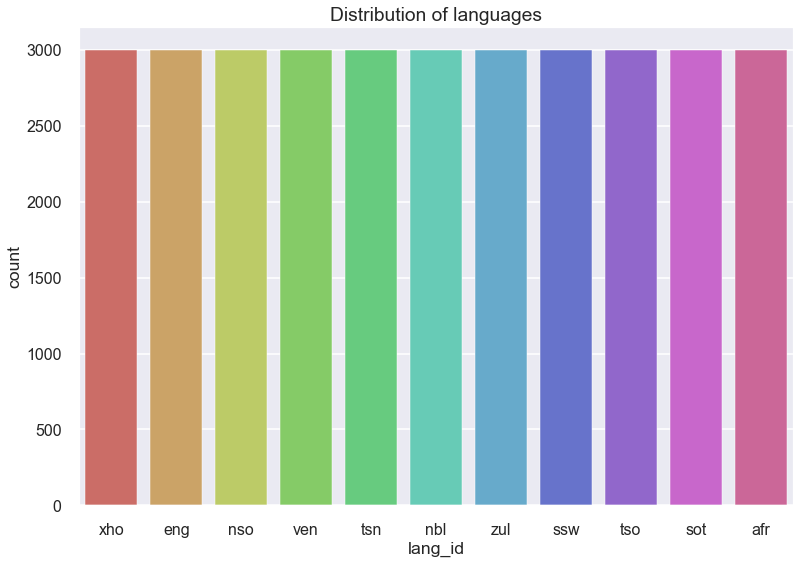

In [7]:
#cheking the language distribution
#visualising the target feature
sns.countplot(x = 'lang_id', data = train_set, palette="hls")
plt.title("Distribution of languages");

- languages look to be evenly distributed

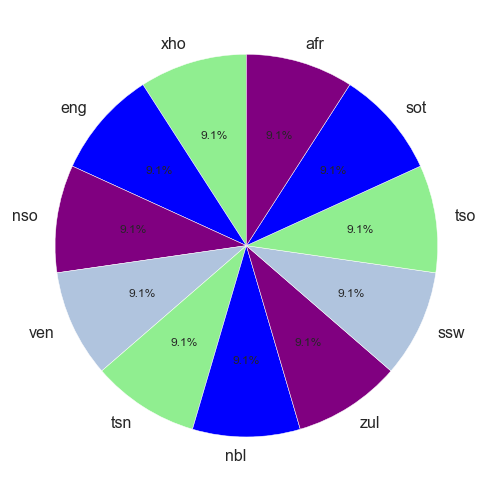

In [8]:
# checking the numerical distribution
values = train_set['lang_id'].value_counts()/train_set.shape[0]
labels = (train_set['lang_id'].value_counts()/train_set.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show()

### checking the count of all the languages on the train set data

In [9]:
#language count check
train_set['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

## 3.1-Text Data cleaning

In [10]:
clean_train_set=train_set

In [11]:
clean_train_set

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [12]:
clean_train_set['text'].iloc[2]

'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months'

In [13]:
#load a text cleaning package
#import  neattext.functions as nfx
def TextCleaner(text):
    # Convert everything to lowercase
    text = text.lower() 

    #remove emogies
    text= text.encode("ascii", "ignore").decode("ascii")
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)  
    
    # Remove punctuation
    text = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', text)
    
    # Remove that funny diamond
    text = re.sub(r"U+FFFD ", ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove space in front of tweet
    text = text.lstrip(' ') 
    
    # removing -
    text= text.replace("-", " ")
     
   
    return text

In [14]:
# Clean message column by applying the above function 'TweetCleaner'
clean_train_set['text'] = clean_train_set['text'].apply(TextCleaner)
clean_train_set.head()

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...
3,nso,o netefata gore o ba file dilo ka moka te le d...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [15]:
#load a text cleaning package
import  neattext.functions as nfx

In [16]:
clean_train_set['text']=clean_train_set['text'].apply(nfx.remove_stopwords)

In [17]:
clean_text= clean_train_set['text']

In [18]:
clean_text

0        umgaqo siseko wenza amalungiselelo kumaziko ax...
1        dha iya kuba nobulumko bokubeka umsebenzi naph...
2        province kwazulu natal department transport in...
3        netefata gore ba file dilo ka moka te le dumel...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke tlisa boeteledip...
32996    modise mosadi na ntse sa utlwe hore thabang ra...
32997    closing date submission completed tenders augu...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha mang le ona lokela ho etsa ditlaleho t...
Name: text, Length: 33000, dtype: object

In [19]:
clean_train_set

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,province kwazulu natal department transport in...
3,nso,netefata gore ba file dilo ka moka te le dumel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke tlisa boeteledip...
32996,sot,modise mosadi na ntse sa utlwe hore thabang ra...
32997,eng,closing date submission completed tenders augu...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


### 3.2 Cleaning  Test_data

In [20]:
#cleaning the test data 
test_set['text'] = test_set['text'].apply(TextCleaner)
test_set['text']=test_set['text'].apply(nfx.remove_stopwords)

test_set.head()

,index,text
0,1,mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### convert sentences into vector

In [21]:
clean_train_set['text'].iloc[2]

'province kwazulu natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000)
x=cv.fit_transform (clean_text).toarray()

In [23]:
x.shape

(33000, 10000)

In [24]:
#label encoding (convert language name into int)
label= LabelEncoder()
y=label.fit_transform(clean_train_set['lang_id'])

In [25]:
#check the shape of the final array
y

array([9, 9, 1, ..., 1, 9, 4])

In [26]:
#check the target feature length
len(y)

33000

In [27]:
#check the labels 
label.classes_

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

In [28]:
#what the finally the set looks like 
clean_train_set=pd.DataFrame(np.c_[clean_text,y],columns=['text','lang_id'])

In [29]:
clean_train_set

,text,lang_id
0,umgaqo siseko wenza amalungiselelo kumaziko ax...,9
1,dha iya kuba nobulumko bokubeka umsebenzi naph...,9
2,province kwazulu natal department transport in...,1
3,netefata gore ba file dilo ka moka te le dumel...,3
4,khomishini ya ndinganyiso ya mbeu yo ewa maana...,8
...,...,...
32995,popo ya dipolateforomo tse ke tlisa boeteledip...,6
32996,modise mosadi na ntse sa utlwe hore thabang ra...,4
32997,closing date submission completed tenders augu...,1
32998,nawuphina umntu ofunyenwe enetyala phantsi kwa...,9


<a id="four"></a>
## 4. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Lets build classification models now

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =42)

In [31]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape 

((26400, 10000), (6600, 10000), (26400,), (6600,))

### - define model

In [32]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB().fit(x_train,y_train)


In [37]:
names = [  'Decision Tree', 'Random Forest',  'AdaBoost']

In [38]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [39]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()   
    
]

In [ ]:
#results = []

#models = {}
#confusion = {}
#class_report = {}


#for name, clf in zip(names, classifiers):    
    #print ('Fitting {:s} model...'.format(name))
    #run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    #print ('... predicting')
    #y_pred = clf.predict(x_train)   
    #y_pred_test = clf.predict(x_test)
    
    #print ('... scoring')
    #accuracy  = metrics.accuracy_score(y_train, y_pred)
    #precision = metrics.precision_score(y_train, y_pred)
    #recall    = metrics.recall_score(y_train, y_pred)
    
    #f1        = metrics.f1_score(y_train, y_pred)    
    #f1_test   = metrics.f1_score(y_test, y_pred_test)    
    
    # Save the results to dictionaries
    #models[name] = clf    
    #confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    #class_report[name] = metrics.classification_report(y_train, y_pred)
    
    #results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
#results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
#results.set_index('Classifier', inplace= True)

#print ('... All done!')

### - test model on test data

In [41]:
pred= classifier.predict(x_test)

In [42]:
pred

array([4, 3, 1, ..., 0, 3, 1])

In [43]:
y_test

array([4, 3, 1, ..., 0, 3, 1])

<a id="five"></a>
## 5. Model evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [44]:
#confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
print (accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9966666666666667
[[583   0   0   0   0   0   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 578   0   0   0   0   0   0   1   4]
 [  0   0   0 623   1   0   1   0   0   0   0]
 [  0   0   0   1 617   0   0   0   0   0   0]
 [  0   0   0   0   0 583   0   0   0   0   1]
 [  1   0   0   0   0   0 597   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   1   0   0   0   0   0   0 605   3]
 [  0   0   7   0   0   0   0   0   0   1 582]]


In [45]:
fnl=pd.DataFrame(np.c_[y_test,pred],columns=['Actual', 'Predicted'])
fnl

,Actual,Predicted
0,4,4
1,3,3
2,1,1
3,3,3
4,3,3
...,...,...
6595,2,2
6596,3,3
6597,0,0
6598,3,3


### generate the csv file to submit to kaggle

In [ ]:
def gen_kaggle_csv(model, df):
    
    #load the test data to a varable "X_unseen"
    X_test = df['text']
    
    #Make a prediction on the test data with the trained model
    preds = model.predict(X_test)
    
    #Reset the index of the test data
    df.reset_index(inplace=True)
    
    index=df['index']
    
    #Convert the lang_id and the prediction 
    sample_submission = pd.DataFrame({'index' : index, 
                                  'lang_id': preds})
    
    #convert file to csv
    sample_submission.to_csv('kaggle.csv', index=False)

    return kaggle
gen_kaggle_csv(classifier, test_set)

In [ ]:
#reverse_train=(train_set['lang_id'])
#label.fit(clean_train_set['lang_id'])
#reverse_train['lang_id'] = label.inverse_transform(y_train)
#reverse_train

#submission = pd.DataFrame({ 'lang_id': test_set.text.values, 'lang_id': pred })
#submission.reset_index(inplace=True)
#submission['index'] = submission['index'] + 1
#submission['lang_id']=(train_set['lang_id'])
#submission.to_csv("my_submission.csv", index=True)

<a id="seven"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

There is a possibility of obtaining better results using parameter tuning and better preprocessing techninques. i will continue conducting research into discovering and training models that might yiled optimal results

<a id="eight"></a>
## 8. Refrences
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

 - [Multivariate plotting](https://www.kaggle.com/residentmario/multivariate-plotting)
 - [Extensive Analysis + Visualisation with Python](https://www.kaggle.com/prashant111/extensive-analysis-visualization-with-python)
 - [Data Visualisation using matplotlib and seaborn](https://aaaanchakure.medium.com/data-visualization-a6dccf643fbb)
 - [Dramatically Improve Your Exploratory Data Analysis (EDA)](https://towardsdatascience.com/dramatically-improve-your-exploratory-data-analysis-eda-a2fc8c851124)
 
**Data Cleaning**
- Language Identification Using Natural Language Processing: https://www.youtube.com/watch?v=wcfKmwpXba4
- NLP for beginners - sentiment analysis of twitter data using sklearn in python: https://www.youtube.com/watch?v=qzBtplRo91o#<br>
- Sentiment analysis using sklearn python in IMDB dataset: https://www.youtube.com/watch?v=glHWiQRgLn4<br>
- Complete eda on text data in python: https://www.youtube.com/watch?v=HVBk2Ge_Q98<br>
- Text data cleaning of tweets analysis: https://www.kaggle.com/code/ragnisah/text-data-cleaning-tweets-analysis/notebook



Thank you